<a href="https://colab.research.google.com/github/Anjana323/classwork/blob/main/python_activity_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equilibrium: {'price': 22.0, 'quantity': 34.0}


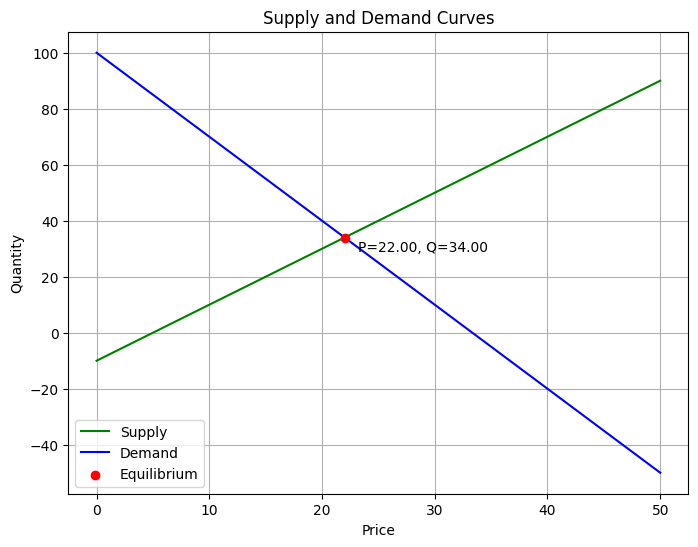

In [ ]:
#puzzle1
import numpy as np
import matplotlib.pyplot as plt

def find_equilibrium(supply_intercept, supply_slope, demand_intercept, demand_slope):
    """
    Find market equilibrium point where supply equals demand.
    """
    # Check if lines are parallel (no intersection)
    if supply_slope == demand_slope:
        return None

    # Solve for price where Qs = Qd
    # supply_intercept + supply_slope*P = demand_intercept + demand_slope*P
    price = (demand_intercept - supply_intercept) / (supply_slope - demand_slope)

    # Calculate equilibrium quantity using either supply or demand equation
    quantity = supply_intercept + supply_slope * price

    return {'price': price, 'quantity': quantity}


def plot_supply_demand(supply_intercept, supply_slope, demand_intercept, demand_slope, equilibrium):
    """
    Plot supply and demand curves with equilibrium point marked.
    """
    # Create price range
    prices = np.linspace(0, max(equilibrium['price'] * 1.5, 50), 100)

    # Calculate quantities
    Qs = supply_intercept + supply_slope * prices
    Qd = demand_intercept + demand_slope * prices

    # Plot supply and demand
    plt.figure(figsize=(8, 6))
    plt.plot(prices, Qs, label='Supply', color='green')
    plt.plot(prices, Qd, label='Demand', color='blue')

    # Mark equilibrium point
    if equilibrium:
        plt.scatter(equilibrium['price'], equilibrium['quantity'], color='red', zorder=5, label='Equilibrium')
        plt.annotate(f"P={equilibrium['price']:.2f}, Q={equilibrium['quantity']:.2f}",
                     (equilibrium['price'], equilibrium['quantity']),
                     textcoords="offset points", xytext=(10, -10))

    # Labels and title
    plt.xlabel('Price')
    plt.ylabel('Quantity')
    plt.title('Supply and Demand Curves')
    plt.legend()
    plt.grid(True)
    plt.show()


# Test
eq = find_equilibrium(-10, 2, 100, -3)
print("Equilibrium:", eq)

plot_supply_demand(-10, 2, 100, -3, eq)

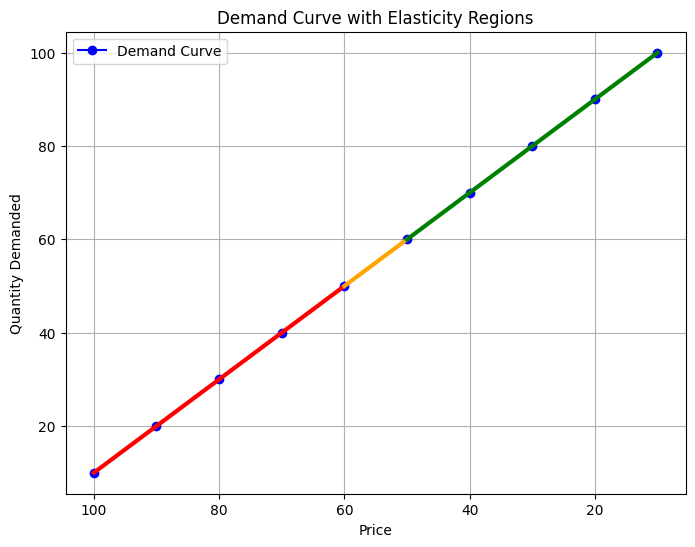

  price_range  elasticity classification
0    100 → 90   -6.333333        Elastic
1     90 → 80   -3.400000        Elastic
2     80 → 70   -2.142857        Elastic
3     70 → 60   -1.444444        Elastic
4     60 → 50   -1.000000   Unit Elastic
5     50 → 40   -0.692308      Inelastic
6     40 → 30   -0.466667      Inelastic
7     30 → 20   -0.294118      Inelastic
8     20 → 10   -0.157895      Inelastic


In [ ]:
#puzzle 2
def calculate_elasticity(price1, quantity1, price2, quantity2):
    """
    Calculate price elasticity of demand using midpoint method.
    """
    # Handle division by zero in price change
    if (price2 + price1) == 0 or (quantity2 + quantity1) == 0:
        return None

    # Midpoint % changes
    pct_change_quantity = (quantity2 - quantity1) / ((quantity2 + quantity1) / 2)
    pct_change_price = (price2 - price1) / ((price2 + price1) / 2)

    if pct_change_price == 0:  # avoid division by zero
        return None

    elasticity = pct_change_quantity / pct_change_price

    # Classification
    if abs(elasticity) > 1:
        classification = "Elastic"
    elif abs(elasticity) < 1:
        classification = "Inelastic"
    else:
        classification = "Unit Elastic"

    return {'elasticity': elasticity, 'classification': classification}


def analyze_demand_curve(df):
    """
    Analyze entire demand curve and calculate elasticity at each point.
    """
    results = []

    for i in range(len(df) - 1):
        p1 = df.loc[i, 'price']
        q1 = df.loc[i, 'quantity_demanded']
        p2 = df.loc[i + 1, 'price']
        q2 = df.loc[i + 1, 'quantity_demanded']

        elasticity_info = calculate_elasticity(p1, q1, p2, q2)
        if elasticity_info:
            results.append({
                'price_range': f"{p1} → {p2}",
                'elasticity': elasticity_info['elasticity'],
                'classification': elasticity_info['classification']
            })

    summary_df = pd.DataFrame(results)

    # Plot demand curve with elasticity color coding
    plt.figure(figsize=(8, 6))
    plt.plot(df['price'], df['quantity_demanded'], marker='o', color='blue', label='Demand Curve')

    # Mark elastic/inelastic regions
    for i, row in summary_df.iterrows():
        p1, p2 = map(float, row['price_range'].split(" → "))
        q1 = df.loc[df['price'] == p1, 'quantity_demanded'].values[0]
        q2 = df.loc[df['price'] == p2, 'quantity_demanded'].values[0]
        color = 'green' if row['classification'] == "Inelastic" else 'red' if row['classification'] == "Elastic" else 'orange'
        plt.plot([p1, p2], [q1, q2], color=color, linewidth=3)

    plt.xlabel('Price')
    plt.ylabel('Quantity Demanded')
    plt.title('Demand Curve with Elasticity Regions')
    plt.gca().invert_xaxis()  # price high to low like typical demand curve
    plt.legend()
    plt.grid(True)
    plt.show()

    return summary_df


# Test
summary = analyze_demand_curve(price_quantity_data)
print(summary)


In [ ]:
#puzzle 3
def find_equilibrium(supply_intercept, supply_slope,
                     demand_intercept, demand_slope):
    """
    Solve for equilibrium price and quantity for linear curves.
    """
    if demand_slope == supply_slope:
        return None  # Parallel curves → no intersection
    price_eq = (supply_intercept - demand_intercept) / (demand_slope - supply_slope)
    quantity_eq = demand_intercept + demand_slope * price_eq
    return {'price': price_eq, 'quantity': quantity_eq}

def calculate_surplus(demand_intercept, demand_slope, supply_intercept, supply_slope,
                     price=None, quantity=None):
    # Find equilibrium if no price/quantity provided
    if price is None or quantity is None:
        eq = find_equilibrium(supply_intercept, supply_slope,
                              demand_intercept, demand_slope)
        if eq is None:
            return None
        price = eq['price']
        quantity = eq['quantity']

    # Price intercepts
    max_price_demand = demand_intercept / (-demand_slope) if demand_slope < 0 else demand_intercept / demand_slope
    min_price_supply = -supply_intercept / supply_slope

    # Surplus calculations
    consumer_surplus = 0.5 * (max_price_demand - price) * quantity
    producer_surplus = 0.5 * (price - min_price_supply) * quantity
    total_surplus = consumer_surplus + producer_surplus

    return {
        'consumer_surplus': consumer_surplus,
        'producer_surplus': producer_surplus,
        'total_surplus': total_surplus,
        'price': price,
        'quantity': quantity
    }

def deadweight_loss_analysis(demand_intercept, demand_slope, supply_intercept, supply_slope,
                           regulated_price):
    eq = find_equilibrium(supply_intercept, supply_slope,
                          demand_intercept, demand_slope)
    if eq is None:
        return None
    eq_surplus = calculate_surplus(demand_intercept, demand_slope,
                                   supply_intercept, supply_slope)

    # Quantities at regulated price
    Qd = demand_intercept + demand_slope * regulated_price
    Qs = supply_intercept + supply_slope * regulated_price
    traded_quantity = min(Qd, Qs)

    reg_surplus = calculate_surplus(demand_intercept, demand_slope,
                                    supply_intercept, supply_slope,
                                    price=regulated_price, quantity=traded_quantity)

    deadweight_loss = eq_surplus['total_surplus'] - reg_surplus['total_surplus']

    if regulated_price < eq['price']:
        regulation_type = "Price Ceiling"
        shortage = Qd - Qs
        surplus_qty = 0
    else:
        regulation_type = "Price Floor"
        shortage = 0
        surplus_qty = Qs - Qd

    return {
        'regulation_type': regulation_type,
        'equilibrium_price': eq['price'],
        'equilibrium_quantity': eq['quantity'],
        'regulated_price': regulated_price,
        'quantity_demanded': Qd,
        'quantity_supplied': Qs,
        'traded_quantity': traded_quantity,
        'consumer_surplus': reg_surplus['consumer_surplus'],
        'producer_surplus': reg_surplus['producer_surplus'],
        'total_surplus': reg_surplus['total_surplus'],
        'deadweight_loss': deadweight_loss,
        'shortage': shortage,
        'surplus_quantity': surplus_qty
    }

# ─── Test Case ───
print("\n🧩 PUZZLE 3: Calculate Economic Surplus")
print("─" * 38)
print("Calculate consumer surplus, producer surplus, and deadweight loss")
print("\nTest case: Same supply/demand from Puzzle 1")
print("Try regulated price of 15 (price ceiling)")

# Demand: Q = 100 - 3P, Supply: Q = -10 + 2P
eq_results = calculate_surplus(100, -3, -10, 2)
print("\n--- Equilibrium Surplus ---")
print(eq_results)

dwl_results = deadweight_loss_analysis(100, -3, -10, 2, 15)
print("\n--- Deadweight Loss Analysis ---")
print(dwl_results)



🧩 PUZZLE 3: Calculate Economic Surplus
──────────────────────────────────────
Calculate consumer surplus, producer surplus, and deadweight loss

Test case: Same supply/demand from Puzzle 1
Try regulated price of 15 (price ceiling)

--- Equilibrium Surplus ---
{'consumer_surplus': 192.6666666666667, 'producer_surplus': 289.0, 'total_surplus': 481.66666666666674, 'price': 22.0, 'quantity': 34.0}

--- Deadweight Loss Analysis ---
{'regulation_type': 'Price Ceiling', 'equilibrium_price': 22.0, 'equilibrium_quantity': 34.0, 'regulated_price': 15, 'quantity_demanded': 55, 'quantity_supplied': 20, 'traded_quantity': 20, 'consumer_surplus': 183.33333333333337, 'producer_surplus': 100.0, 'total_surplus': 283.33333333333337, 'deadweight_loss': 198.33333333333337, 'shortage': 35, 'surplus_quantity': 0}



🧩 PUZZLE 4: Consumer Choice Theory
─────────────────────────────────────
Find optimal consumption bundle given budget constraint and preferences

Optimal bundle and utility:
x* = 12.00
y* = 20.00
U* ≈ 14.72


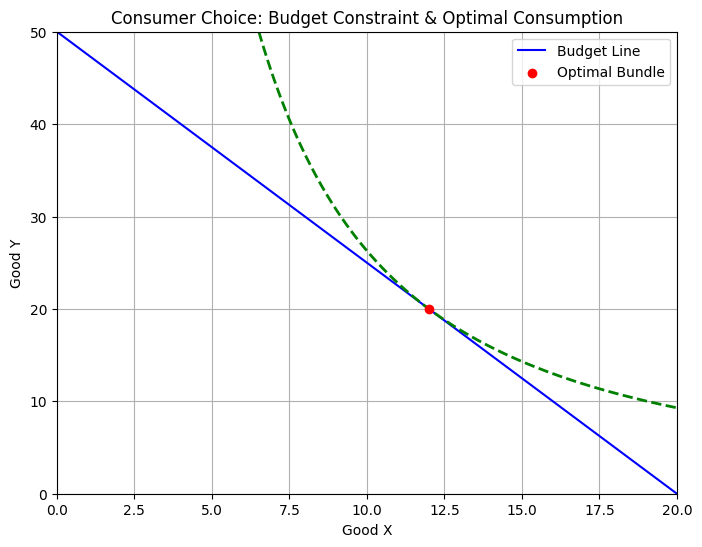

In [ ]:
#puzzle 4
import numpy as np
import matplotlib.pyplot as plt

print("\n🧩 PUZZLE 4: Consumer Choice Theory")
print("─" * 37)
print("Find optimal consumption bundle given budget constraint and preferences")

def budget_constraint(income, price_x, price_y):
    max_x = income / price_x
    max_y = income / price_y
    x_values = np.linspace(0, max_x, 50)
    y_values = (income - price_x * x_values) / price_y
    y_values[y_values < 0] = 0  # No negative consumption

    return {
        'x_values': x_values,
        'y_values': y_values,
        'max_x': max_x,
        'max_y': max_y
    }

def cobb_douglas_utility(x, y, alpha=0.5):
    x = np.maximum(x, 0)
    y = np.maximum(y, 0)
    return (x ** alpha) * (y ** (1 - alpha))

def find_optimal_consumption(income, price_x, price_y, alpha=0.5):
    x_opt = (alpha * income) / price_x
    y_opt = ((1 - alpha) * income) / price_y
    max_utility = cobb_douglas_utility(x_opt, y_opt, alpha)

    return {
        'x_optimal': x_opt,
        'y_optimal': y_opt,
        'max_utility': max_utility
    }

def plot_consumption(income, price_x, price_y, alpha=0.5):
    # Get budget line data
    budget = budget_constraint(income, price_x, price_y)

    # Find optimal bundle
    opt = find_optimal_consumption(income, price_x, price_y, alpha)

    # Create grid for utility curves
    x_grid = np.linspace(0, budget['max_x'], 100)
    y_grid = np.linspace(0, budget['max_y'], 100)
    X, Y = np.meshgrid(x_grid, y_grid)
    U = cobb_douglas_utility(X, Y, alpha)

    # Plot budget line
    plt.figure(figsize=(8, 6))
    plt.plot(budget['x_values'], budget['y_values'], label='Budget Line', color='blue')

    # Plot indifference curve at optimal utility
    optimal_U = opt['max_utility']
    plt.contour(X, Y, U, levels=[optimal_U], colors='green', linestyles='dashed', linewidths=2)

    # Plot optimal point
    plt.scatter(opt['x_optimal'], opt['y_optimal'], color='red', zorder=5, label='Optimal Bundle')

    # Labels and legend
    plt.xlabel("Good X")
    plt.ylabel("Good Y")
    plt.title("Consumer Choice: Budget Constraint & Optimal Consumption")
    plt.legend()
    plt.grid(True)
    plt.show()

# Test case
result = find_optimal_consumption(100, 5, 2, alpha=0.6)
print("\nOptimal bundle and utility:")
print(f"x* = {result['x_optimal']:.2f}")
print(f"y* = {result['y_optimal']:.2f}")
print(f"U* ≈ {result['max_utility']:.2f}")

# Plot
plot_consumption(100, 5, 2, alpha=0.6)





🧩 PUZZLE 5: GDP Analysis
─────────────────────────
Calculate GDP using different methods and analyze growth rates


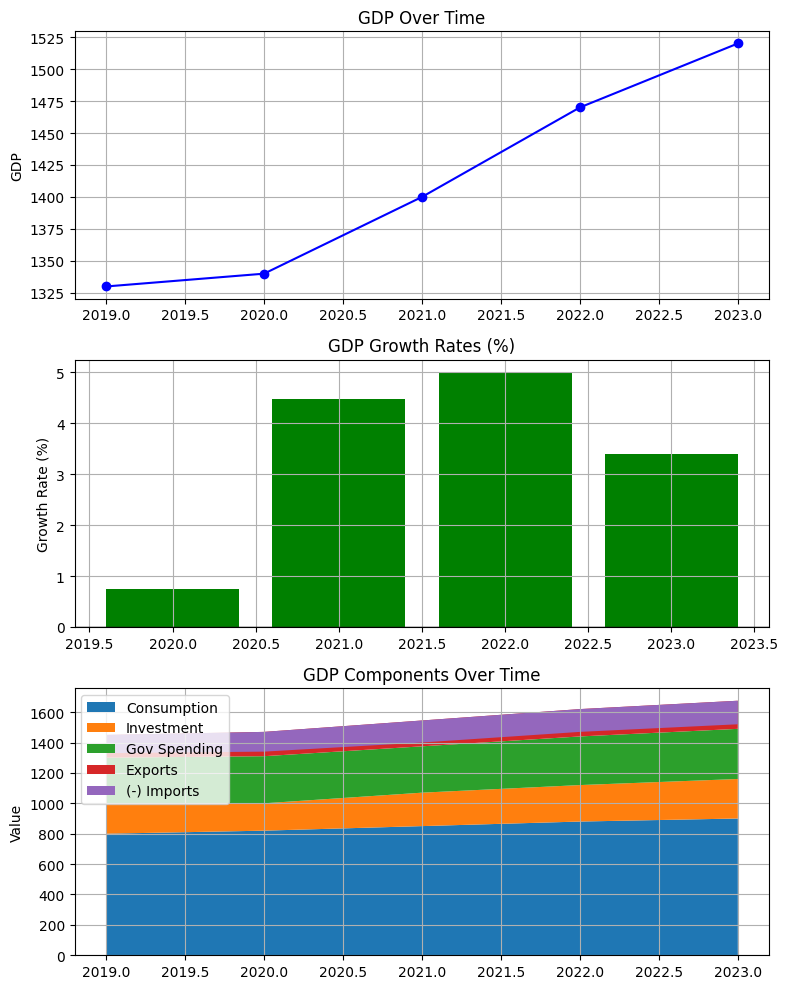


Summary Statistics:
Average GDP Growth (%): 3.4077130459410787
Recession Years: []


In [ ]:
#puzzle 5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("\n🧩 PUZZLE 5: GDP Analysis")
print("─" * 25)
print("Calculate GDP using different methods and analyze growth rates")

# Sample economic data
economic_data = {
    'consumption': [800, 820, 850, 880, 900],
    'investment': [200, 180, 220, 240, 260],
    'government_spending': [300, 310, 305, 320, 330],
    'exports': [150, 160, 170, 180, 185],
    'imports': [120, 130, 145, 150, 155],
    'year': [2019, 2020, 2021, 2022, 2023]
}

gdp_data = pd.DataFrame(economic_data)

def calculate_gdp_expenditure(consumption, investment, government, exports, imports):
    """GDP = C + I + G + (X - M)"""
    return np.array(consumption) + np.array(investment) + np.array(government) + (np.array(exports) - np.array(imports))

def calculate_growth_rates(gdp_series):
    """Calculate YoY GDP growth rates."""
    growth_rates = [None]  # First year has no growth rate
    recession_years = []

    for i in range(1, len(gdp_series)):
        growth = ((gdp_series[i] - gdp_series[i-1]) / gdp_series[i-1]) * 100
        growth_rates.append(growth)
        if growth < 0:
            recession_years.append(i)  # store index

    avg_growth = np.nanmean([g for g in growth_rates if g is not None])
    return {
        'growth_rates': growth_rates,
        'average_growth': avg_growth,
        'recession_years': recession_years
    }

def gdp_analysis_dashboard(df):
    # 1. Calculate GDP
    df['GDP'] = calculate_gdp_expenditure(df['consumption'], df['investment'],
                                          df['government_spending'], df['exports'], df['imports'])

    # 2. Calculate growth rates
    growth_info = calculate_growth_rates(df['GDP'])
    df['GDP_growth'] = growth_info['growth_rates']

    # 3. Create plots
    fig, axes = plt.subplots(3, 1, figsize=(8, 10))

    # GDP levels
    axes[0].plot(df['year'], df['GDP'], marker='o', color='blue')
    axes[0].set_title("GDP Over Time")
    axes[0].set_ylabel("GDP")
    axes[0].grid(True)

    # GDP growth rates
    axes[1].bar(df['year'], df['GDP_growth'], color=['red' if g is not None and g < 0 else 'green' for g in df['GDP_growth']])
    axes[1].set_title("GDP Growth Rates (%)")
    axes[1].set_ylabel("Growth Rate (%)")
    axes[1].axhline(0, color='black', linewidth=1)
    axes[1].grid(True)

    # GDP components
    axes[2].stackplot(df['year'],
                      df['consumption'], df['investment'], df['government_spending'],
                      df['exports'], -df['imports'],  # subtract imports
                      labels=['Consumption', 'Investment', 'Gov Spending', 'Exports', '(-) Imports'])
    axes[2].set_title("GDP Components Over Time")
    axes[2].set_ylabel("Value")
    axes[2].legend(loc='upper left')
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

    # 4. Summary statistics
    summary = {
        'Average GDP Growth (%)': growth_info['average_growth'],
        'Recession Years': [df['year'].iloc[i] for i in growth_info['recession_years']]
    }

    return {
        'data': df,
        'summary': summary
    }

# Test
analysis_results = gdp_analysis_dashboard(gdp_data)

print("\nSummary Statistics:")
for k, v in analysis_results['summary'].items():
    print(f"{k}: {v}")



🧩 PUZZLE 6: Price Index and Inflation Analysis
───────────────────────────────────────────────
Calculate CPI, inflation rates, and convert nominal to real values

CPI and Inflation Analysis:
   year         CPI  Inflation (%)  Nominal GDP     Real GDP
0  2020  100.000000            NaN         1000  1000.000000
1  2021  107.397959       7.397959         1050   977.672209
2  2022  132.653061      23.515439         1100   829.230769
3  2023  127.295918      -4.038462         1200   942.685371

Average inflation rate: 8.96%


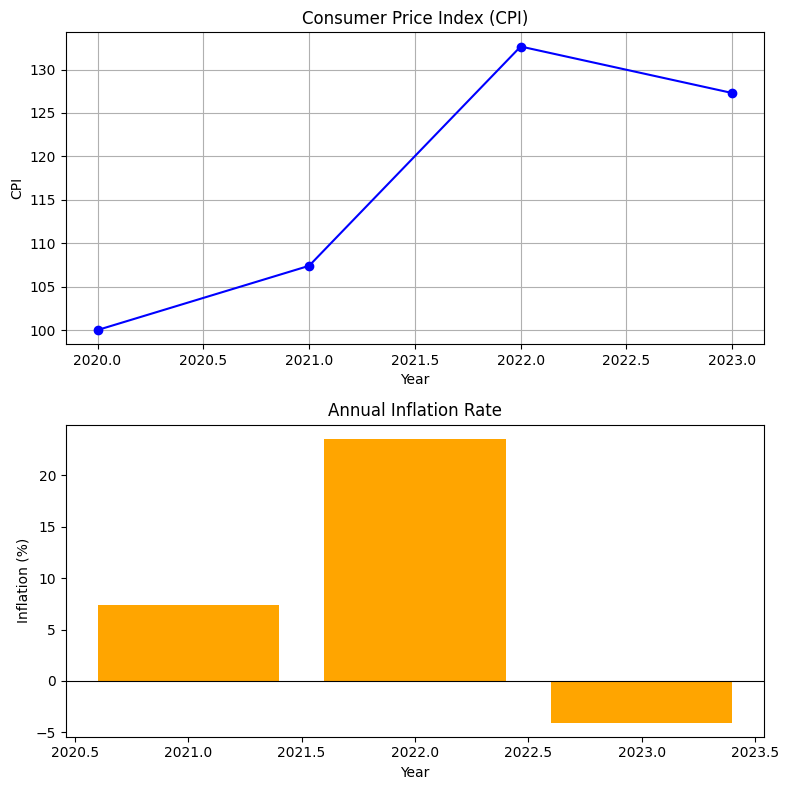

In [ ]:
#puzzle 6
import pandas as pd
import matplotlib.pyplot as plt

print("\n🧩 PUZZLE 6: Price Index and Inflation Analysis")
print("─" * 47)
print("Calculate CPI, inflation rates, and convert nominal to real values")

# Sample price data for market basket
price_data = pd.DataFrame({
    'year': [2020, 2021, 2022, 2023],
    'bread_price': [2.50, 2.65, 2.80, 3.00],
    'milk_price': [3.20, 3.35, 3.60, 3.75],
    'gas_price': [2.85, 3.10, 4.20, 3.80],
    'bread_quantity': [100, 100, 100, 100],  # Base year quantities
    'milk_quantity': [50, 50, 50, 50],
    'gas_quantity': [200, 200, 200, 200]
})

def calculate_cpi(df, base_year=2020):
    """Calculate CPI using Laspeyres method."""
    # Cost of basket in each year using base year quantities
    base_year_data = df[df['year'] == base_year].iloc[0]
    base_cost = (
        base_year_data['bread_price'] * base_year_data['bread_quantity'] +
        base_year_data['milk_price'] * base_year_data['milk_quantity'] +
        base_year_data['gas_price'] * base_year_data['gas_quantity']
    )

    costs = (
        df['bread_price'] * base_year_data['bread_quantity'] +
        df['milk_price'] * base_year_data['milk_quantity'] +
        df['gas_price'] * base_year_data['gas_quantity']
    )

    cpi = (costs / base_cost) * 100
    return cpi

def calculate_inflation_rate(cpi_series):
    """Calculate annual inflation rates from CPI data."""
    inflation_rates = cpi_series.pct_change() * 100
    average_inflation = inflation_rates[1:].mean()
    return {
        'inflation_rates': inflation_rates,
        'average_inflation': average_inflation
    }

def nominal_to_real(nominal_values, cpi_values, base_year_cpi=100):
    """Convert nominal values to real values using CPI."""
    return (nominal_values / cpi_values) * base_year_cpi

# ---- RUN CALCULATIONS ----
price_data['CPI'] = calculate_cpi(price_data)
inflation_data = calculate_inflation_rate(price_data['CPI'])
price_data['Inflation (%)'] = inflation_data['inflation_rates']

# Example nominal GDP data (billions)
price_data['Nominal GDP'] = [1000, 1050, 1100, 1200]
price_data['Real GDP'] = nominal_to_real(price_data['Nominal GDP'], price_data['CPI'])

# ---- DISPLAY TABLE ----
print("\nCPI and Inflation Analysis:")
print(price_data[['year', 'CPI', 'Inflation (%)', 'Nominal GDP', 'Real GDP']])
print(f"\nAverage inflation rate: {inflation_data['average_inflation']:.2f}%")

# ---- PLOTS ----
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# CPI plot
ax[0].plot(price_data['year'], price_data['CPI'], marker='o', color='blue')
ax[0].set_title("Consumer Price Index (CPI)")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("CPI")
ax[0].grid(True)

# Inflation rate plot
ax[1].bar(price_data['year'], price_data['Inflation (%)'], color='orange')
ax[1].set_title("Annual Inflation Rate")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Inflation (%)")
ax[1].axhline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()
